In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-02-16 00:58:11.905610: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-16 00:58:11.946182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 00:58:12.542405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [4]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [5]:
path = directory_path / 'experiment'/ '20240215'/'normal_washino_5min.wav'

163.835
71
[101034, 125178, 205876, 259839, 333666, 426830, 764697, 896714, 2387717, 3168279, 3192561, 3567568, 3614181, 3769817, 4231488, 4328464, 4573863, 4644111, 4729326, 4807312, 4857168, 5070145, 5204645, 5228121, 5325107, 5750802, 5861685, 5986204, 6420348, 6520173, 6969238, 7190231, 7369162, 7425570, 7442589, 7485478, 7534578, 7561682, 7674427, 8066280, 8094822, 8134702, 8391455, 9521493, 9579409, 9670922, 9775293, 9972809, 9996798, 10065615, 10313010, 10351369, 10372097, 10442306, 10530678, 10720075, 10747357, 10864501, 10961290, 11066047, 11191187, 11211683, 11303832, 11543907, 11612258, 11625731, 11636621, 11647998, 11660420, 11763154, 11832376]
[102399, 142321, 211986, 260501, 334956, 443461, 765612, 898219, 2406283, 3182351, 3243865, 3582165, 3621141, 3776641, 4233946, 4340465, 4579884, 4649494, 4732527, 4812624, 4858038, 5087161, 5209882, 5229729, 5325995, 5764798, 5903672, 6002642, 6423162, 6523088, 6987886, 7191234, 7401764, 7431478, 7454557, 7504160, 7538754, 7567013, 

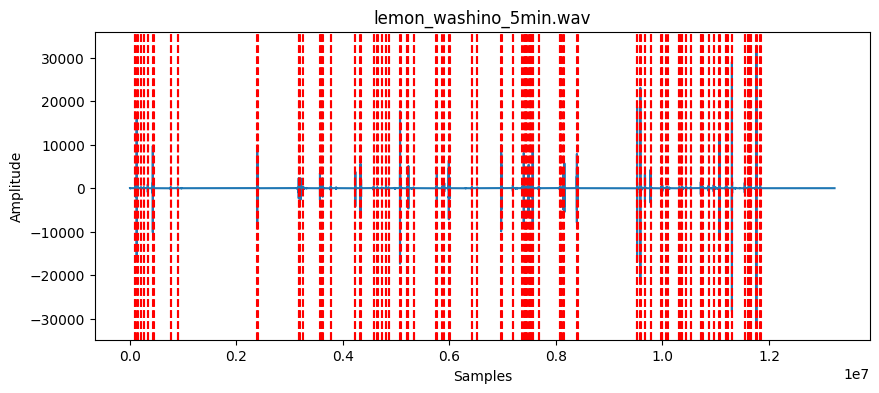

/home/s2/Desktop/washino/swallowing-recognize


In [6]:
wav1 = long_audio.Long_audio(path)
wav1.plot("lemon_washino_5min.wav")

In [7]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '20240213_binary_ep70_bs32_v2.keras'
wav1.predict(model_path, 2)

/home/s2/Desktop/washino/swallowing-recognize/ipynb_swallowing/20240213_binary_ep70_bs32_v2.keras


2024-02-16 00:58:25.503888: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22065 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


(71, 224, 224, 3)


2024-02-16 00:58:35.854204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-02-16 00:58:36.034644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 2s 80ms/step
Predicted classes: [1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]


## ここまでは必ずやる
やっていることは  
import  
どのwavファイルを解析するか指定  
wavファイルをデータセットにしウェーブレット変換  
変換したものを学習  

### wavファイルの嚥下と識別された部分を図示

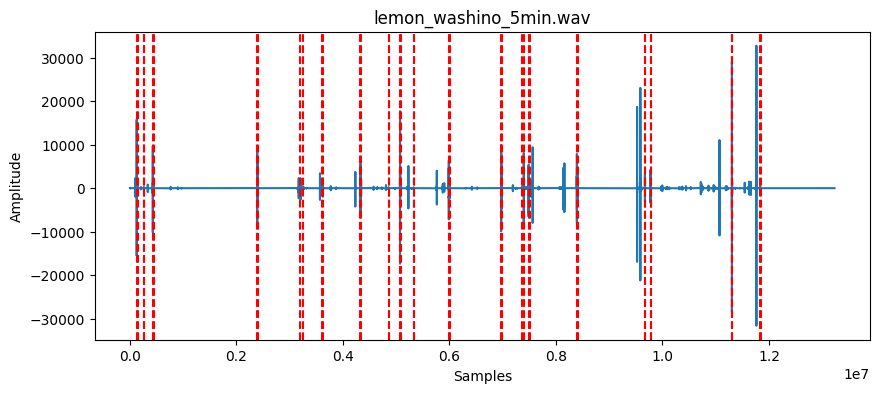

In [8]:
wav1.plot_predicted("lemon_washino_5min.wav")

### 嚥下回数を前後30秒の計60秒で何回しているか図示

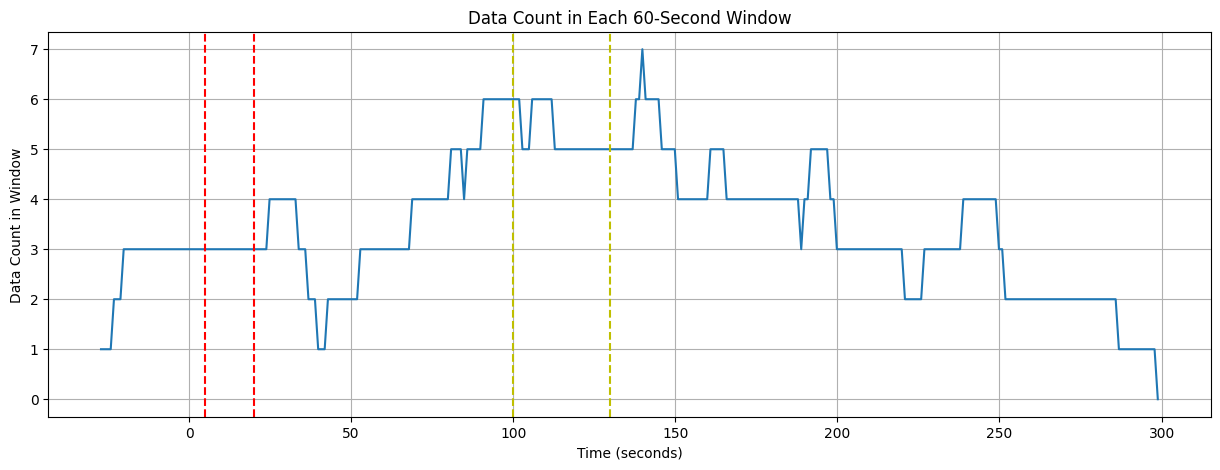

In [10]:
wav1.plot_swallowing_count(30, 1, red = [5, 20], yellow = [100, 130])

### 唾液推定に必要な数字を算出
wavファイル内の嚥下回数  
ある範囲の回数を認識
リスト形式でプリント
嚥下の時間を算出

In [13]:
print(len(wav1.swallowing_start_idxs))
start_array = wav1.swallowing_start_idxs/44100
end_array = wav1.swallowing_end_idxs/44100

19


In [17]:
sections = np.arange(0, 301, 60)
counts, _ = np.histogram(start_array, bins=sections)

print("Sections:", sections)
print("Counts in each section:", counts)

Sections: [  0  60 120 180 240 300]
Counts in each section: [4 5 5 3 2]


In [18]:
start_list = list(start_array)
end_list = list(end_array)
print(start_list)
print(end_list)

[2.838503401360544, 5.8920408163265305, 9.678684807256236, 54.14324263038549, 72.39367346938775, 81.95421768707483, 98.1511111111111, 110.13986394557823, 114.96927437641723, 120.75072562358277, 135.7415873015873, 158.03260770975058, 167.10117913832198, 169.73873015873016, 190.28242630385486, 219.295283446712, 221.66197278911565, 256.3227210884354, 268.3078458049887]
[3.227233560090703, 5.907052154195012, 10.055804988662132, 54.564240362811795, 73.55702947845805, 82.11204081632653, 98.42324263038549, 110.15959183673469, 115.35512471655329, 120.77086167800454, 136.11433106575964, 158.45546485260772, 167.84045351473924, 170.162358276644, 190.6334693877551, 219.50122448979593, 221.96770975056688, 256.5614739229025, 268.6578684807256]


In [20]:
time = end_array - start_array
print(list(time))
print((np.mean(time)))
print(np.sum(time))

[0.38873015873015904, 0.015011337868481078, 0.3771201814058962, 0.4209977324263079, 1.1633560090702986, 0.15782312925169606, 0.2721315192743816, 0.019727891156463784, 0.38585034013605934, 0.020136054421769245, 0.37274376417235544, 0.42285714285713993, 0.7392743764172565, 0.4236281179138359, 0.35104308390023675, 0.20594104308392502, 0.3057369614512311, 0.23875283446710682, 0.35002267573690915]
0.3489939133548163
6.630884353741509


### wavファイルの波形と嚥下タイミングを描画

In [67]:
wav1.save_png_swallowing_number_line('out.png')
wav1.display_HTML('out.png')

In [7]:
wav1.save_plots_to_pdf('20240205washino\30min.pdf')